<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the libraries we might need and setting the random seed to 0
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
import sklearn
import math
from sklearn import decomposition
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed to 0
np.random.seed(0)

Question 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


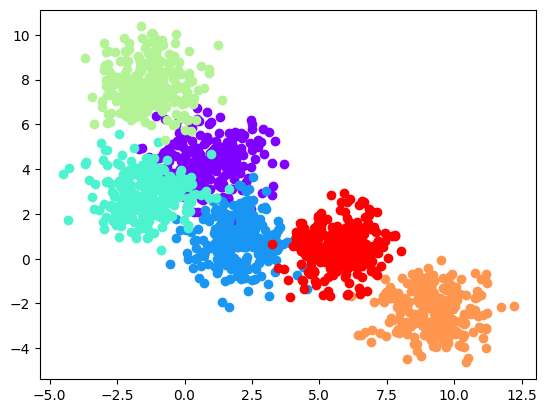

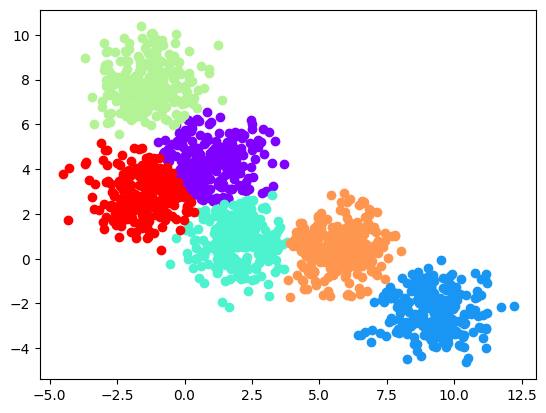

In [ ]:
# Generating the test data
X, y = make_blobs(1500, cluster_std = 1, centers = 6)

# Setting up a k means cluster algorithm
km = KMeans(6)

predictions = km.fit_predict(X)

# Plotting
fig1, ax1 = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, 6))
for i in range(0, 6):
  plt.scatter(X[y==i, 0], X[y==i, 1], color = colors[i])

fig2, ax2 = plt.subplots()
for i in range(0, 6):
  plt.scatter(X[predictions==i, 0], X[predictions==i, 1], color = colors[i])

Above we have generated a clustered dataset and then used the kmeans algorithm to create a classifier for the data.

Question 2

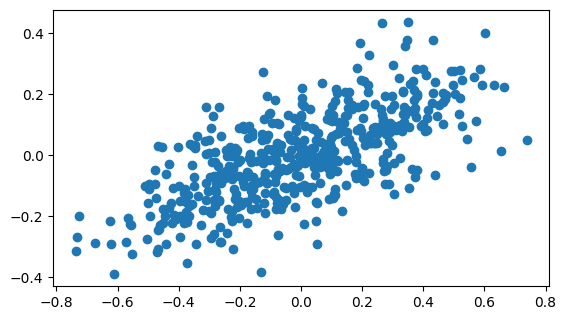

In [ ]:
# Importing the function to generate a covariance matrix
def get_cov(sdx = 1, sdy = 1, rotangdeg = 0):
  # Adding the standard deviation squared values to the covariance matrix
  covar = np.array([[sdx**2, 0], [0, sdy**2]])
  # Converting the units of the rotation angle
  rot_ang = (rotangdeg / 360) * 2 * np.pi
  # Writing the rotation matrix
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

  # rotating the covar values
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar

# Generating the covariance matrix we need
covar = get_cov(0.3, 0.1, 23)
# Generating the dataset using this
Norm = np.random.multivariate_normal([0, 0], covar, size = 500)

# Plotting the dataset
fig3, ax3 = plt.subplots()
plt.scatter(Norm[:, 0], Norm[:, 1])
ax3.set_aspect('equal', 'box')

Above we have generated a multivariate normal distributed rotated by 23 degrees and then plotted.

22.063001935333475


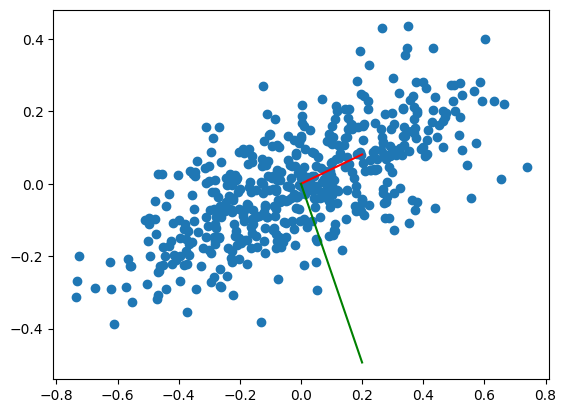

In [ ]:
# Performing principal component analysis
pca = PCA(2)
pca.fit(Norm)

# Plotting lines of the PCA components
a = pca.components_
grad1 = a[0, 1] / a[0, 0]
grad2 = a[1, 1] / a[1, 0]
x = np.array([0, 0.2])
y1 = x * grad1
y2 = x * grad2

fig4, ax4 = plt.subplots()
plt.scatter(Norm[:, 0], Norm[:, 1])
ax3.set_aspect('equal', 'box')
plt.plot(x, y1, color = 'red')
plt.plot(x, y2, color = 'green')

angle = math.degrees(math.atan(grad1))

print(angle)

Question 3

Part A

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[7.19831173 7.70619219]
[3.19462558 1.91429061]
[2.88507126 6.39672699]


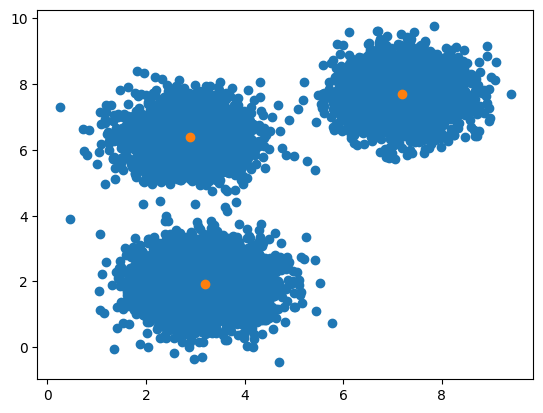

In [32]:
# Firstly want to import the dataset
dataset1 = pandas.read_csv('/content/volts.csv')
# Assigning data
x1 = np.array(dataset1['x1'][:])
x2 = np.array(dataset1['x2'][:])
y1 = np.array(dataset1['y1'][:])
y2 = np.array(dataset1['y2'][:])

# Plotting the y values
figcw1, axcw1 = plt.subplots()
plt.scatter(y1, y2)

# As can be seen from the plot the y data corresponds to 3 clusters of results, using a k means
# cluster algorithm it should be possible to determine the centre of these cluster
# Setting up a k means cluster algorithm
km = KMeans(3)
Y = np.zeros([len(x1), 2])
Y[:, 0] = y1
Y[:,1] = y2
# Fitting to the output voltage data
km.fit(Y)
centers = km.cluster_centers_
# Plotting centers as a visual check
plt.scatter(centers[:, 0], centers[:, 1])

# Printing values
# This center will correspond to class 0
print(centers[0, :])
# This center will correspond to class 1
print(centers[1, :])
# This center will correspond to class 2
print(centers[2, :])

# Creating an array of the class labels for each input and corresponding output
classes = km.labels_

In [ ]:
Part B

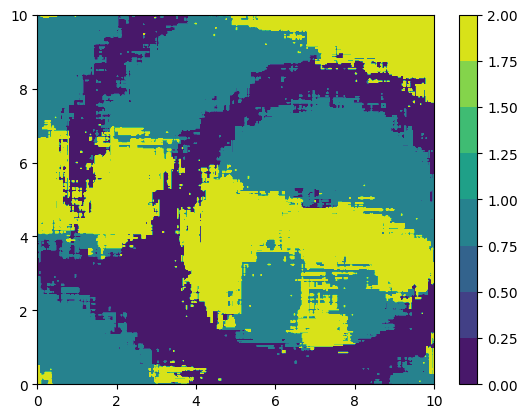

In [48]:
# Initialising the random forest
rf = ensemble.RandomForestClassifier(100, max_depth = 20)
# Fitting to the data
X = np.zeros([len(x1), 2])
X[:, 0] = x1
X[:,1] = x2
rf.fit(X, classes)

# Creating a test set
x1line = np.linspace(0, 10, 501)
x2line = np.linspace(0, 10, 501)
x1mesh, x2mesh = np.meshgrid(x1line, x2line)
Xgrid = np.array([x1mesh, x2mesh]).reshape([2, 501*501]).T

# Predicting
rfprobs = rf.predict_proba(Xgrid)
predictions = np.zeros([len(rfprobs[:,0])])
# Processing
for i in range(len(rfprobs[:,0])):
  if (rfprobs[i, 0] > rfprobs[i, 1]) & (rfprobs[i, 0] > rfprobs[i, 2]):
    predictions[i] = 0
  elif (rfprobs[i, 1] > rfprobs[i, 0]) & (rfprobs[i, 1] > rfprobs[i, 2]):
    predictions[i] = 1
  elif (rfprobs[i, 2] > rfprobs[i, 0]) & (rfprobs[i, 2] > rfprobs[i, 1]):
    predictions[i] = 2


# Reshaping
predictionsreshape = np.reshape(predictions, [501, 501])

# Plotting
figcw2, axcw2 = plt.subplots()
plt.contourf(x1line, x2line, predictionsreshape)
plt.colorbar()

Part C

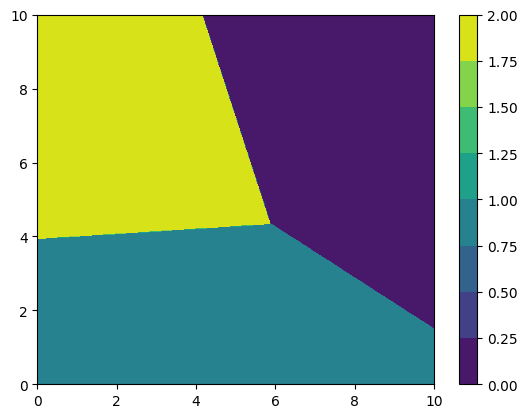

In [52]:
# Defining the nearest neighbour function
def which_nearest(x_test, X):
  # get size
  n_points, n_dims = X.shape
  # This will contain the shortest distance - set to infinity to start
  shortest_distance = float('inf')
  # This will identify the closest point
  which_point = -1

  for point_cnt in range(n_points):
    current_distance = (X[point_cnt, 0] - x_test[0])**2 + (X[point_cnt, 1] - x_test[1])**2

    if current_distance < shortest_distance:
      which_point = point_cnt
      shortest_distance = current_distance
  return which_point

# In our case in the function above X will be our 3 center points in an array and the
# function will be looped over our X grid points taking each value in turn as the x_test
# value
predictionsNN = np.zeros([len(Xgrid[:,0])])
for i in range(len(Xgrid[:,0])):
  predictionsNN[i] = which_nearest(Xgrid[i, :], centers)

# Reshaping
predictionsNNreshape = np.reshape(predictionsNN, [501, 501])

# Plotting
figcw3, axcw3 = plt.subplots()
plt.contourf(x1line, x2line, predictionsNNreshape)
plt.colorbar()